# Plot mean expression of key genes across states to gain statistical confidence in abundance trends - Figure 6F

In [1]:
%matplotlib inline

import os
import helper_functions_GSE164638 as hf

import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.io
import matplotlib.pyplot as plt

## Import/Export Directories

In [2]:
# for AnnData objects from Scanpy:
# These AnnData objects contain output from the filtering and QC notebook
# Containing unnormalized counts matrices with low-count barcodes removed
h5ad_dir = '_h5ad_files'
os.makedirs(h5ad_dir, exist_ok=True)

# for plots from matplotlib, seaborn, helper functions plots:
plot_dir = '_plots_avg_gene_exp_among_states'
os.makedirs(plot_dir, exist_ok=True)

## Plotting Settings

In [3]:
# scanpy
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=150, 
                     frameon=True, vector_friendly=True, fontsize=14, 
                     figsize=None, color_map=None, format='eps', 
                     facecolor=None, transparent=False, ipython_format='png2x')

sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=150)  # low dpi (dots per inch) yields small inline figure

In [4]:
# matplotlib params:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=12)
plt.rcParams['pdf.fonttype'] = 42

# seaborn
sns.set(context='notebook', style='white', font_scale=0.5)

## Load single cell data

In [5]:
adata = sc.read(f'{h5ad_dir}/adata_merged_annotated_perturbations.h5ad')

In [6]:
# optionally restrict to cells which have at least 1000 counts

### Split the data into experiments

In [7]:
adata_36 = adata[adata.obs['duration'].isin(['36h'])]

In [8]:
adata_12 = adata[adata.obs['duration'].isin(['12h'])]

### Split the experiment data by treatment condition

In [9]:
adata_36_dmso = adata_36[adata_36.obs['treatment'].isin(['DMSO'])]

In [10]:
adata_36_cftr = adata_36[adata_36.obs['treatment'].isin(['CFTR-inh172'])]

In [11]:
adata_12_dmso = adata_12[adata_12.obs['treatment'].isin(['DMSO'])]

In [12]:
adata_12_forsk = adata_12[adata_12.obs['treatment'].isin(['Forskolin'])]

In [13]:
# count only the 845 cells that meet the criteria for abundance plots (makes insignificant difference)
adata_12_forsk = adata_12_forsk[adata_12_forsk.obs.loc[adata_12_forsk.obs['n_counts'] >= 1000].index] 

In [14]:
def make_mean_barplot_by_annot(gene, adata, obs_state_group, adata_name, plot_dir):
    # make a bar plot of the means of the CP10K gene expression within annotations across pooled conditions-
    
        
    idx_states = {}
    for state in adata.obs[obs_state_group].unique():
        idx_states[state] = adata.obs.loc[adata.obs[obs_state_group] == state].index

    adata_norm = adata.raw[:, gene].X/adata.raw.X.sum(axis=1)*1e4
    adata_norm_df = pd.DataFrame(adata_norm, index=adata.obs.index)
    #print(adata_norm_df.index)

    adata_norm_subsets = {} 
    for state, indices in idx_states.items():
        adata_norm_subsets[state] = adata_norm_df.loc[indices]


    mean_dict = {}
    SE_dict = {}
    for state, norm_data in adata_norm_subsets.items():
        mean_dict[state] = norm_data.mean()
        SE_dict[state] = norm_data.std()/np.sqrt(len(norm_data))


    mean_df = pd.DataFrame.from_dict(mean_dict, orient='index').rename(columns={0: 'Mean Exp'})
    SE_df = pd.DataFrame.from_dict(SE_dict, orient='index').rename(columns={0: 'SE'})
    df_annot_ = mean_df.merge(SE_df, on=SE_df.index).rename(columns={'key_0': 'state'})
    df_annot_.index = df_annot_['state']
    del df_annot_['state']

    df_annot_ = df_annot_.reindex(['Tuft', 'Secretory', 'Enteroendocrine', 'Enterocyte', 'Stem', 'Stretch Signature'])

    ax = df_annot_.plot(kind='barh', y='Mean Exp', xerr=df_annot_['SE'], legend=False) 
    fig = ax.get_figure()
    fig.tight_layout()
    fig.savefig(f'{plot_dir}/{adata_name}_{gene}_mean_exp_across_states_barplot.eps')
    
    return fig, df_annot_

***anxa1***

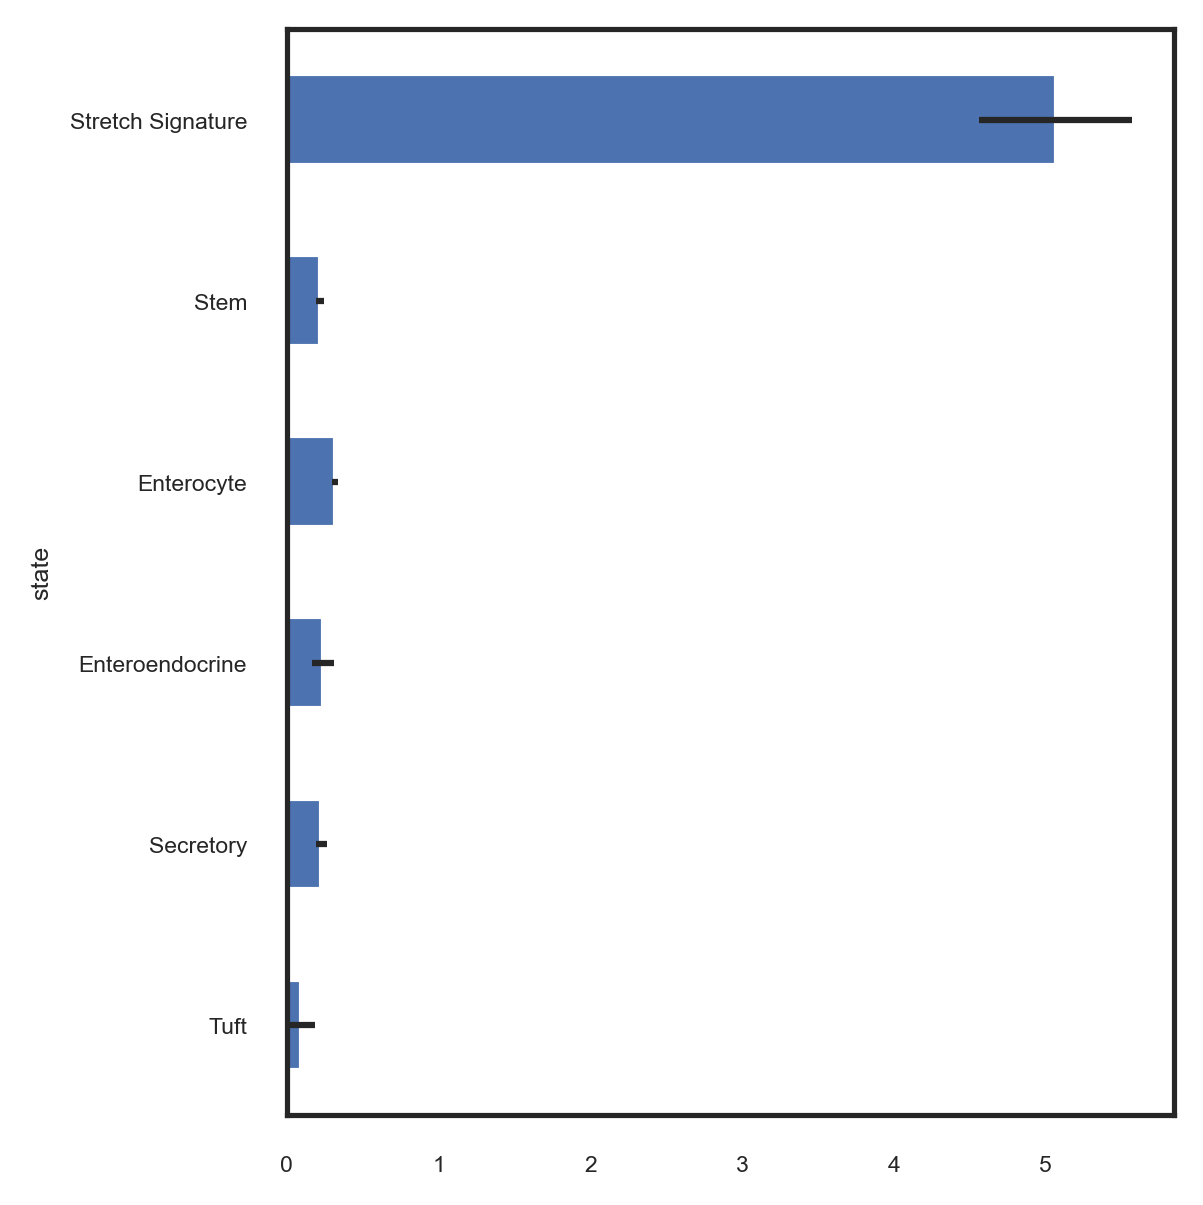

In [15]:
axna1_plot, anxa1_df = make_mean_barplot_by_annot('anxa1', adata, 'state_coarse_grain', 'All', plot_dir)

***basp1***

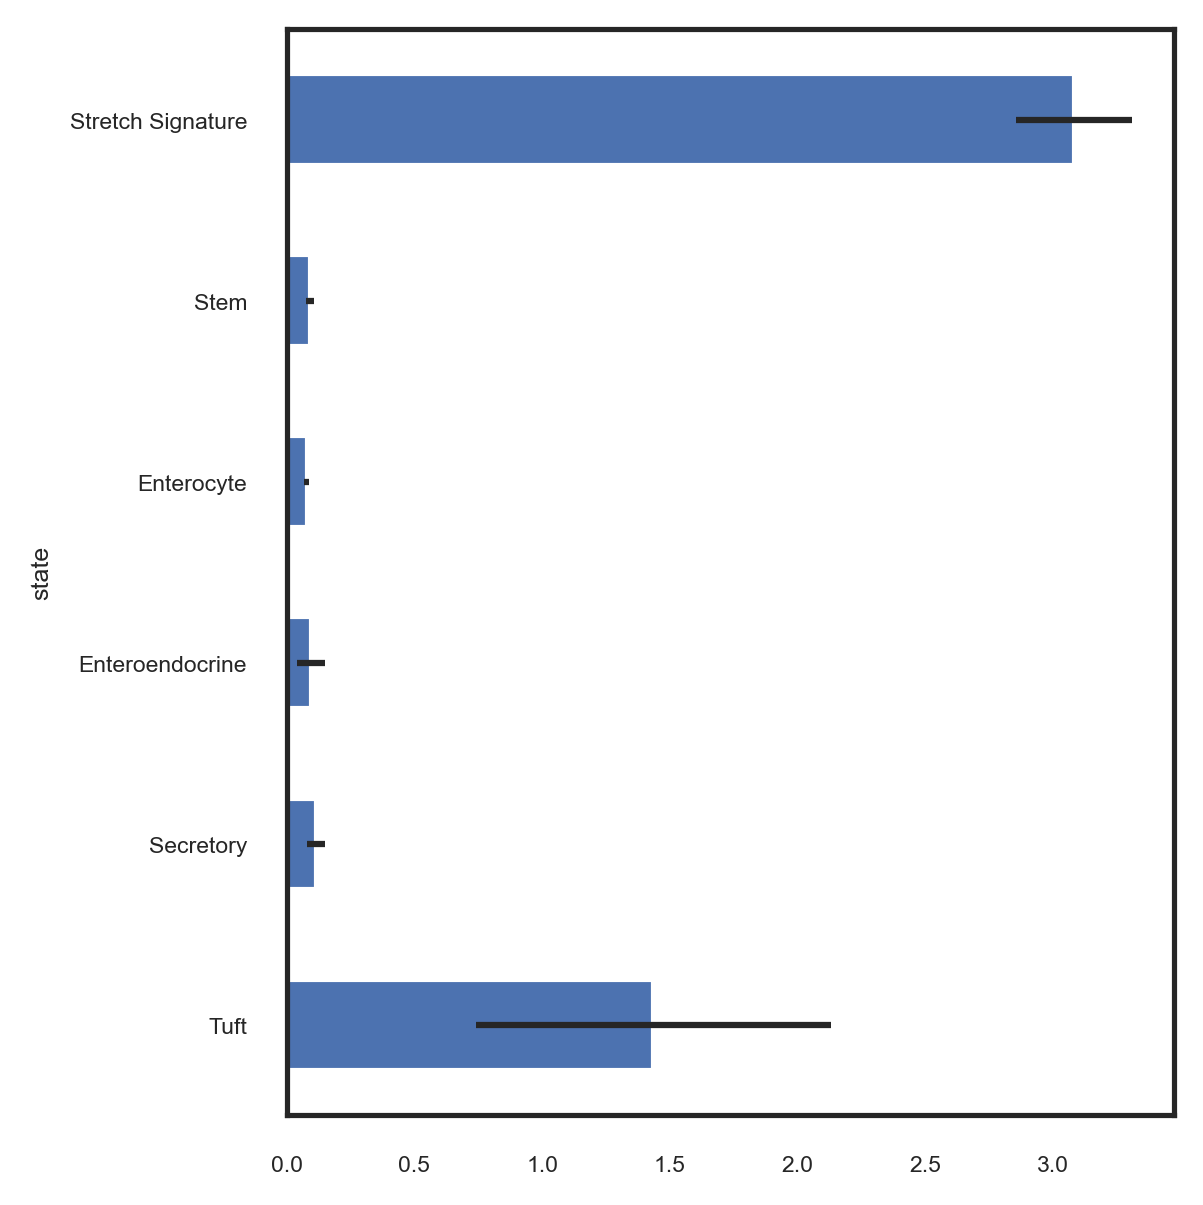

In [16]:
basp1_plot, basp1_df = make_mean_barplot_by_annot('basp1', adata, 'state_coarse_grain', 'All', plot_dir)

***clu***

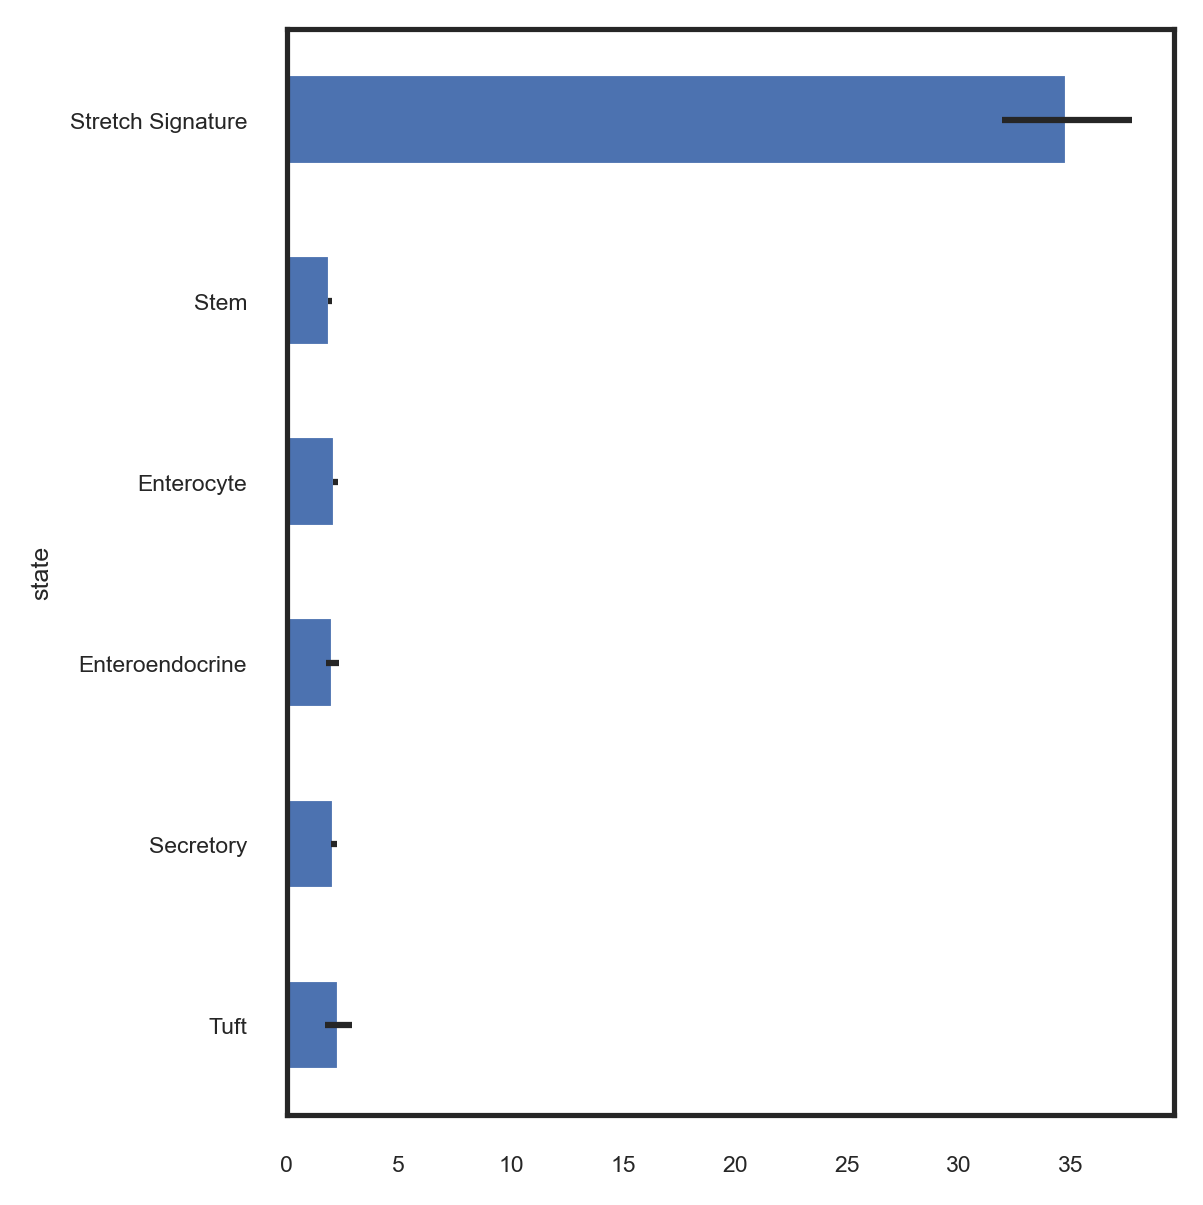

In [17]:
clu_plot, clu_df = make_mean_barplot_by_annot('clu', adata, 'state_coarse_grain', 'All', plot_dir)

***piezo1***

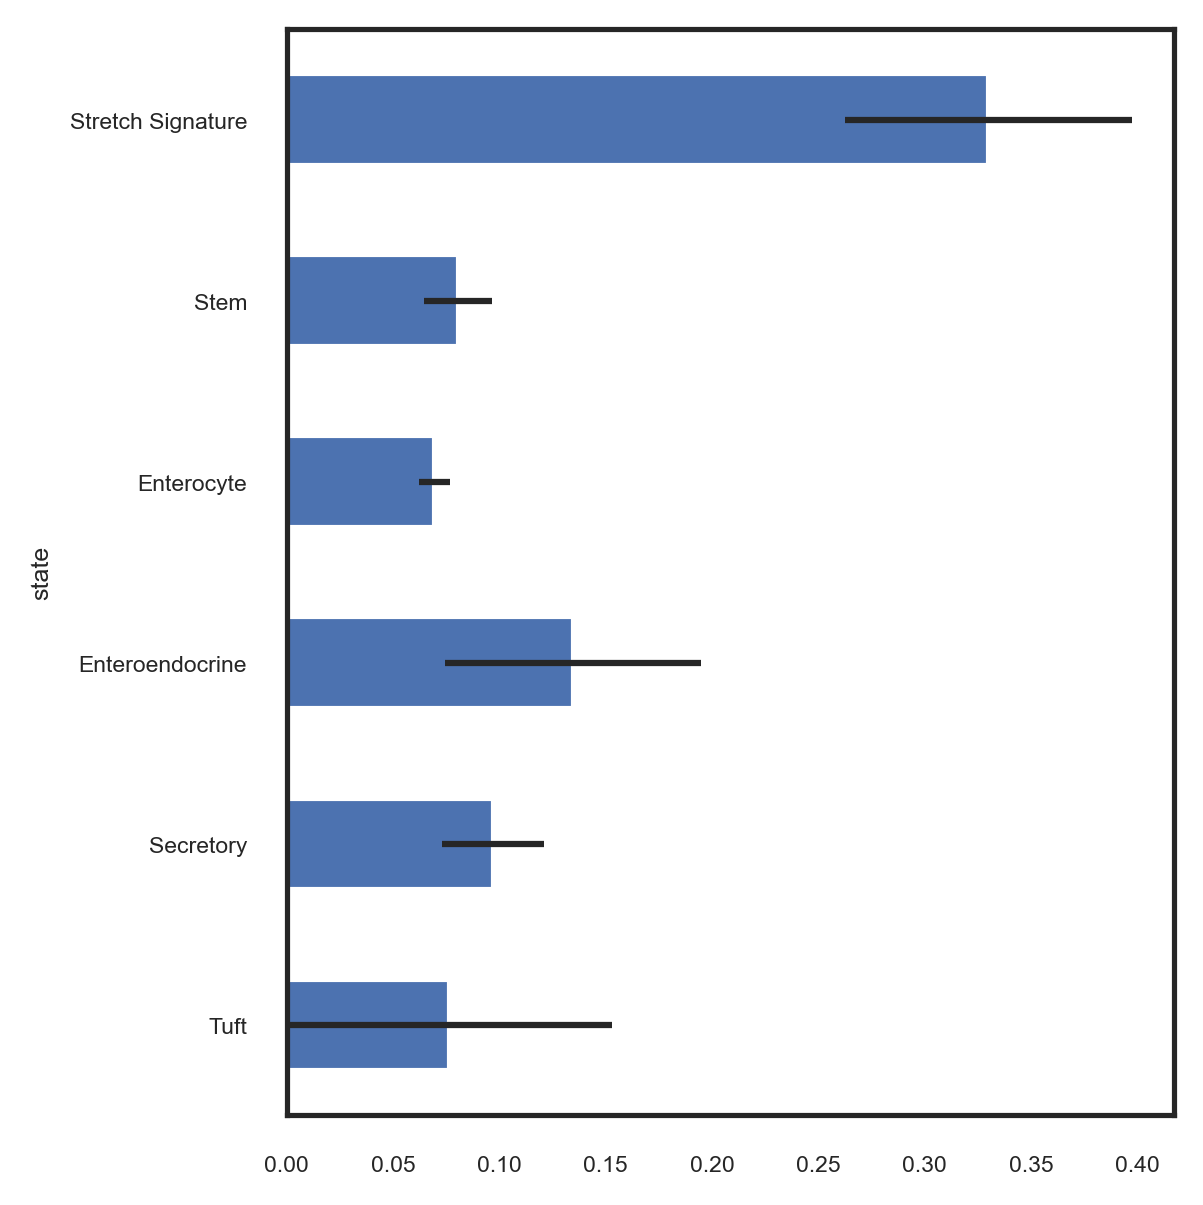

In [18]:
piezo1_plot, piezo1_df = make_mean_barplot_by_annot('piezo1', adata, 'state_coarse_grain', 'All', plot_dir)

#### Take a look at housekeeping genes (should be very similar in expression)

***elf1***

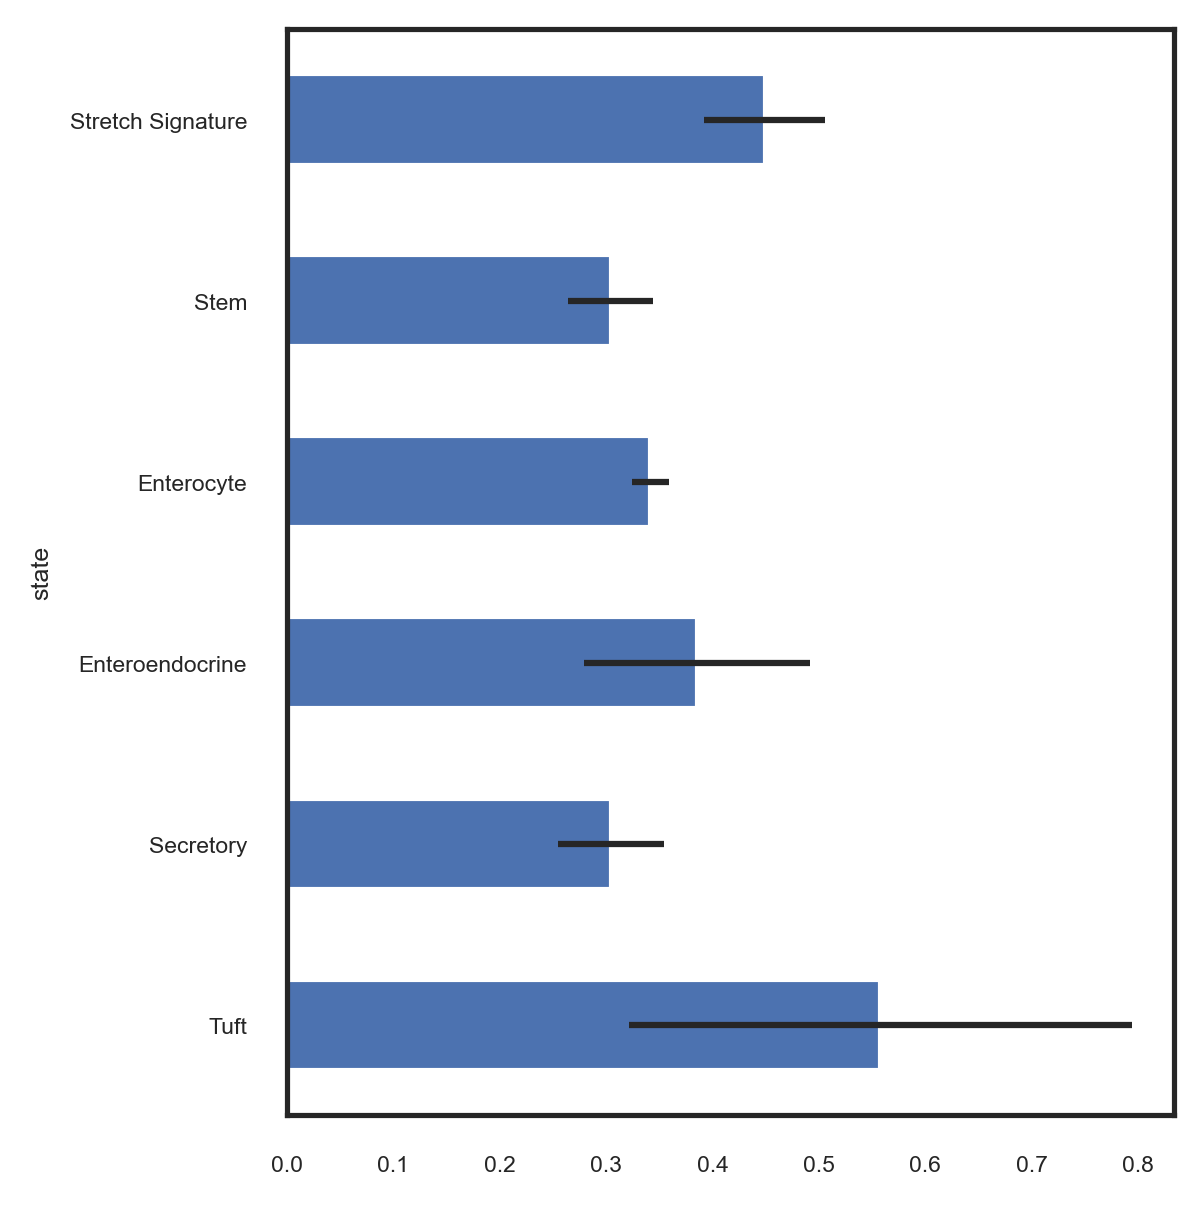

In [19]:
plot_elf1, df_elf1 = make_mean_barplot_by_annot('elf1', adata, 'state_coarse_grain', 'All', plot_dir)

***gapdh***

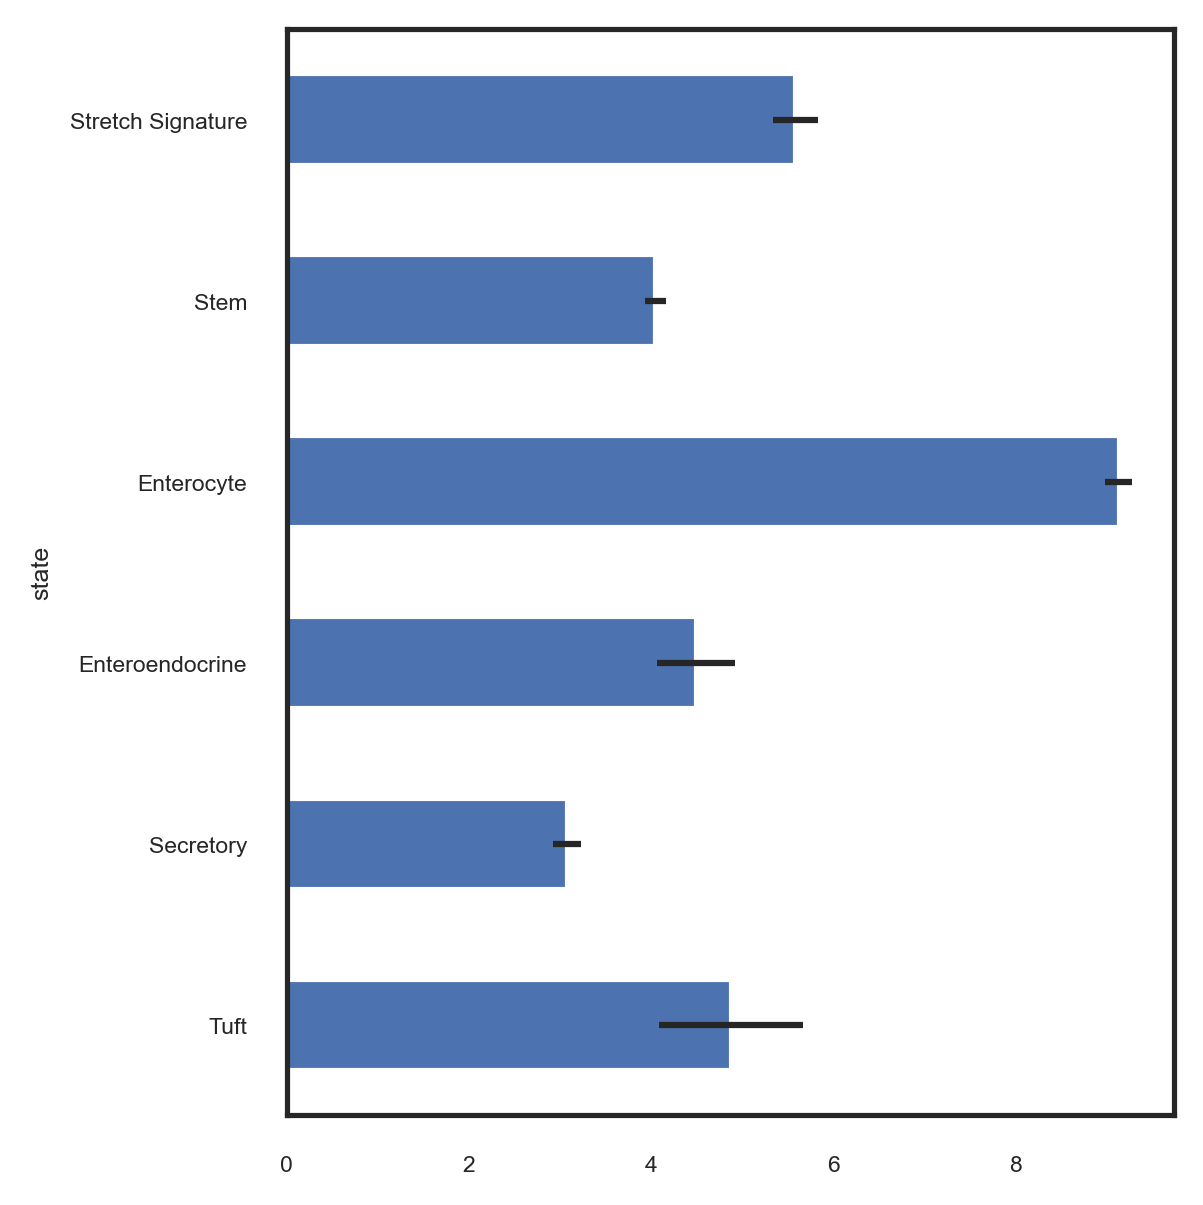

In [20]:
plot_gapdh, df_gapdh = make_mean_barplot_by_annot('gapdh', adata, 'state_coarse_grain', 'All', plot_dir)